In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
scale = MinMaxScaler()

### Data importing and cleaning

In [115]:
data = pd.read_csv('./data.csv')
data.drop(columns=['Unnamed: 0','S.No','USERNAME','Caption','Hashtags'], inplace=True)
data.head(1)

,Followers,Time since posted,Likes
0,1600,11 hours,139


In [116]:
data['Time since posted'] = data['Time since posted'].str.replace(' hours','').astype('float')
data.head(1)

,Followers,Time since posted,Likes
0,1600,11.0,139


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Followers          100 non-null    int64  
 1   Time since posted  100 non-null    float64
 2   Likes              100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


### Data analysis

(<Axes: >,
                    Followers  Time since posted     Likes
 Followers           1.000000           0.251154  0.266218
 Time since posted   0.251154           1.000000  0.609888
 Likes               0.266218           0.609888  1.000000)

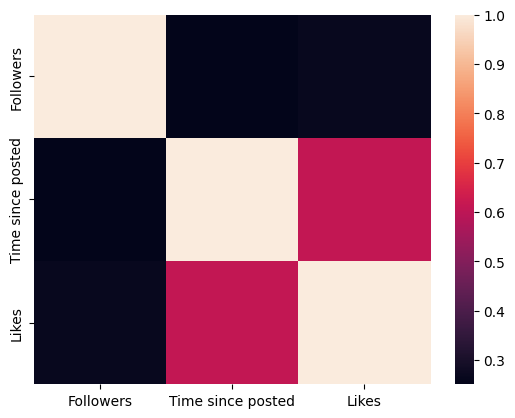

In [118]:
sns.heatmap(data.corr()), data.corr()

### Data splitting and scaling

In [119]:
x = scale.fit_transform(data['Time since posted'])
y = data['Likes']

ValueError: Expected 2D array, got 1D array instead:
array=[11.  2.  2.  3.  3.  3.  3.  4.  4.  7.  7.  8.  9. 11.  3.  3.  4.  4.
  4.  4.  5.  2.  2.  2.  2.  2.  2. 20.  4.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2. 14.  2.  2.  2.  2.  2.  2.  2.  3.  3.  4.  4.  4.  4.  4.
  7. 24.  2.  2.  2.  2.  2.  3.  2.  3.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  4.  2.  2.  2.
  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=500, test_size=0.2)

### Model training

In [ ]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

### Metrics

R2 score is: -0.5969118036851453
MSE is: 588.44203826043


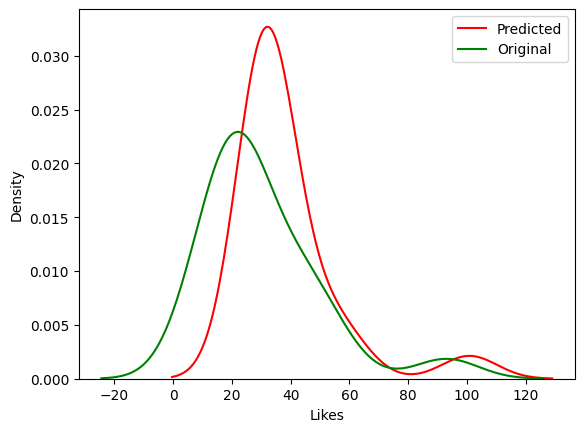

In [ ]:
ax = sns.kdeplot(ypred,color='red',label='Predicted')
sns.kdeplot(ytest,color='green',label='Original',ax=ax)
plt.legend()

print("R2 score is: {}".format(r2_score(ytest,ypred)))
print("MSE is: {}".format(mean_squared_error(ytest,ypred)))